In [1]:
import pandas as pd
import numpy as np 
import logging
import fastf1
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Exploring car performance by analysing team pace over the 2024 season

In [2]:
fastf1.Cache.enable_cache('./cache')

In [27]:
# Get team names



AttributeError: module 'fastf1' has no attribute 'get_season_results'

In [58]:
def car_race_pace(season_year: int, team_name: str):
    fastf1.logger.set_log_level(logging.CRITICAL)
    season_calendar = fastf1.get_event_schedule(year=season_year, include_testing=False)
    team_pace = []
    drivers_pace = []    
    for i in range(len(season_calendar)):
        event = season_calendar.get_event_by_round(i+1)
        race = event.get_race()
        race.load()
        print(f'Processing {event.EventName} for {team_name}\'s {season_year} season')
        laps = race.laps
        condition = (
            (laps['Team'] == team_name) &
            (laps['IsAccurate'] == True) &
            (laps['Deleted'] == False) &
            (laps['LapTime'].notna())
        )
        drivers = laps.loc[condition].copy()
        drivers['LapTime'] = drivers['LapTime'].dt.total_seconds()
        driver_pace = drivers.groupby('Driver').agg(AvgLapTime=('LapTime', 'mean'), 
                                                     MedianLapTime = ('LapTime', 'median'),
                                                                                 SlowestLapTime = ('LapTime', 'max'),
                                                                                 FastestLapTime = ('LapTime', 'min'),
                                                                                 Quantile10LapTime = ('LapTime', lambda x: np.percentile(x, 10)),
                                                                                 Quantile90LapTime = ('LapTime', lambda x: np.percentile(x, 90)),
                                                                                 Q1LapTime = ('LapTime', lambda x: np.percentile(x, 25)),
                                                                                 Q3LapTime = ('LapTime', lambda x: np.percentile(x, 75)),   
                                                                                 )
        #plt.boxplot(drivers['LapTime'])
        #plt.show()       
        driver_pace['Event'] = event.EventName 
        drivers['Event'] = event.EventName
        team_pace.append(drivers.reset_index())
        drivers_pace.append(driver_pace.reset_index())
        #return driver_pace
        
    full_season_drivers_pace_df = pd.concat(drivers_pace, ignore_index=True)
    full_season_team_pace_df = pd.concat(team_pace, ignore_index=True)
    
    plt.figure(figsize=(12, 6)) # Set figure size
    sns.lineplot(data=full_season_drivers_pace_df, x='Event', y='AvgLapTime', hue='Driver', marker='o')

    plt.title(f"Average Lap Pace for {team_name} Drivers - {season_year} Season", fontsize=16)
    plt.xlabel("Event", fontsize=12)
    plt.ylabel("Average Lap Time (seconds)", fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
    plt.tight_layout() 
    plt.show() 
    return full_season_drivers_pace_df, full_season_team_pace_df


In [73]:
def car_qualifying_pace(season_year: int, team_name: str):
    fastf1.logger.set_log_level(logging.CRITICAL)
    season_calendar = fastf1.get_event_schedule(year=season_year, include_testing=False)
    team_pace = []
    drivers_pace_q1 = []
    drivers_pace_q2 = []
    drivers_pace_q3 = []    
    for i in range(len(season_calendar)):
        event = season_calendar.get_event_by_round(i+1)
        qualifying = event.get_qualifying()
        qualifying.load()
        qualifying_laps = qualifying.laps
        laps_q1, laps_q2, laps_q3 = qualifying_laps.split_qualifying_sessions()
        print(f'Processing {event.EventName} for {team_name}\'s {season_year} season')
        condition = (
            (laps_q1['Team'] == team_name) 
            #(laps_q1['IsAccurate'] == True) &
            #(laps_q1['Deleted'] == False) &
            #(laps_q1['LapTime'].notna()) &
            #(laps_q1['IsPersonalBest'] == True)
        )
        team_pace_q1 = laps_q1.loc[condition].copy()
        team_pace_q2 = laps_q2.loc[condition].copy()
        team_pace_q3 = laps_q3.loc[condition].copy()
        team_pace_q1['LapTime'] = team_pace_q1['LapTime'].dt.total_seconds()
        team_pace_q2['LapTime'] = team_pace_q2['LapTime'].dt.total_seconds()
        team_pace_q3['LapTime'] = team_pace_q3['LapTime'].dt.total_seconds()
        driver_pace_q1 = team_pace_q1.groupby('Driver').agg(AvgLapTime=('LapTime', 'mean'), 
                                                     MedianLapTime = ('LapTime', 'median'),
                                                                                 SlowestLapTime = ('LapTime', 'max'),
                                                                                 FastestLapTime = ('LapTime', 'min'),
                                                                                 Quantile10LapTime = ('LapTime', lambda x: np.percentile(x, 10)),
                                                                                 Quantile90LapTime = ('LapTime', lambda x: np.percentile(x, 90)),
                                                                                 )
        driver_pace_q2 = team_pace_q2.groupby('Driver').agg(AvgLapTime=('LapTime', 'mean'), 
                                                     MedianLapTime = ('LapTime', 'median'),
                                                                                 SlowestLapTime = ('LapTime', 'max'),
                                                                                 FastestLapTime = ('LapTime', 'min'),
                                                                                 Quantile10LapTime = ('LapTime', lambda x: np.percentile(x, 10)),
                                                                                 Quantile90LapTime = ('LapTime', lambda x: np.percentile(x, 90)),
                                                                                 )
        driver_pace_q3 = team_pace_q3.groupby('Driver').agg(AvgLapTime=('LapTime', 'mean'), 
                                                     MedianLapTime = ('LapTime', 'median'),
                                                                                 SlowestLapTime = ('LapTime', 'max'),
                                                                                 FastestLapTime = ('LapTime', 'min'),
                                                                                 Quantile10LapTime = ('LapTime', lambda x: np.percentile(x, 10)),
                                                                                 Quantile90LapTime = ('LapTime', lambda x: np.percentile(x, 90)),
                                                                                 )
        #plt.boxplot(drivers['LapTime'])
        #plt.show()       
        driver_pace_q1['Event'] = event.EventName 
        driver_pace_q2['Event'] = event.EventName
        driver_pace_q3['Event'] = event.EventName
        
        drivers_pace_q1.append(driver_pace_q1.reset_index())
        drivers_pace_q2.append(driver_pace_q2.reset_index())
        drivers_pace_q3.append(driver_pace_q3.reset_index())
        #return driver_pace
        
    full_season_drivers_pace_q1_df = pd.concat(drivers_pace_q1, ignore_index=True)
    full_season_drivers_pace_q2_df = pd.concat(drivers_pace_q2, ignore_index=True)
    full_season_drivers_pace_q3_df = pd.concat(drivers_pace_q3, ignore_index=True)
    full_season_team_pace_q1_df = pd.concat(team_pace_q1, ignore_index=True)
    full_season_team_pace_q2_df = pd.concat(team_pace_q2, ignore_index=True)
    full_season_team_pace_q3_df = pd.concat(team_pace_q3, ignore_index=True)
    
    plt.figure(figsize=(12, 6)) # Set figure size
    sns.lineplot(data=full_season_drivers_pace_q1_df, x='Event', y='AvgLapTime', hue='Driver', marker='o')

    plt.title(f"Average Lap Pace for {team_name} Drivers - {season_year} Season", fontsize=16)
    plt.xlabel("Event", fontsize=12)
    plt.ylabel("Average Lap Time (seconds)", fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
    plt.tight_layout() 
    plt.show() 
    
    plt.figure(figsize=(12, 6)) # Set figure size
    sns.lineplot(data=full_season_drivers_pace_q2_df, x='Event', y='AvgLapTime', hue='Driver', marker='o')

    plt.title(f"Average Lap Pace for {team_name} Drivers - {season_year} Season", fontsize=16)
    plt.xlabel("Event", fontsize=12)
    plt.ylabel("Average Lap Time (seconds)", fontsize=12)   
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
    plt.tight_layout() 
    plt.show() 
    
    plt.figure(figsize=(12, 6)) # Set figure size
    sns.lineplot(data=full_season_drivers_pace_q3_df, x='Event', y='AvgLapTime', hue='Driver', marker='o')

    plt.title(f"Average Lap Pace for {team_name} Drivers - {season_year} Season", fontsize=16)
    plt.xlabel("Event", fontsize=12)
    plt.ylabel("Average Lap Time (seconds)", fontsize=12)   
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
    plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside plot
    plt.tight_layout() 
    plt.show()
    
    
    return full_season_drivers_pace_q1_df, full_season_drivers_pace_q2_df, full_season_drivers_pace_q3_df, full_season_team_pace_q1_df, full_season_team_pace_q2_df, full_season_team_pace_q3_df


In [74]:
SEASON = 2024
TEAM = 'McLaren'

McLaren_drivers_pace_q1, McLaren_drivers_pace_q2, McLaren_drivers_pace_q3, McLaren_team_pace_q1, McLaren_team_pace_q2, McLaren_team_pace_q3 = car_qualifying_pace(2024, 'McLaren')


Processing Bahrain Grand Prix for McLaren's 2024 season


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Generating boxplot...


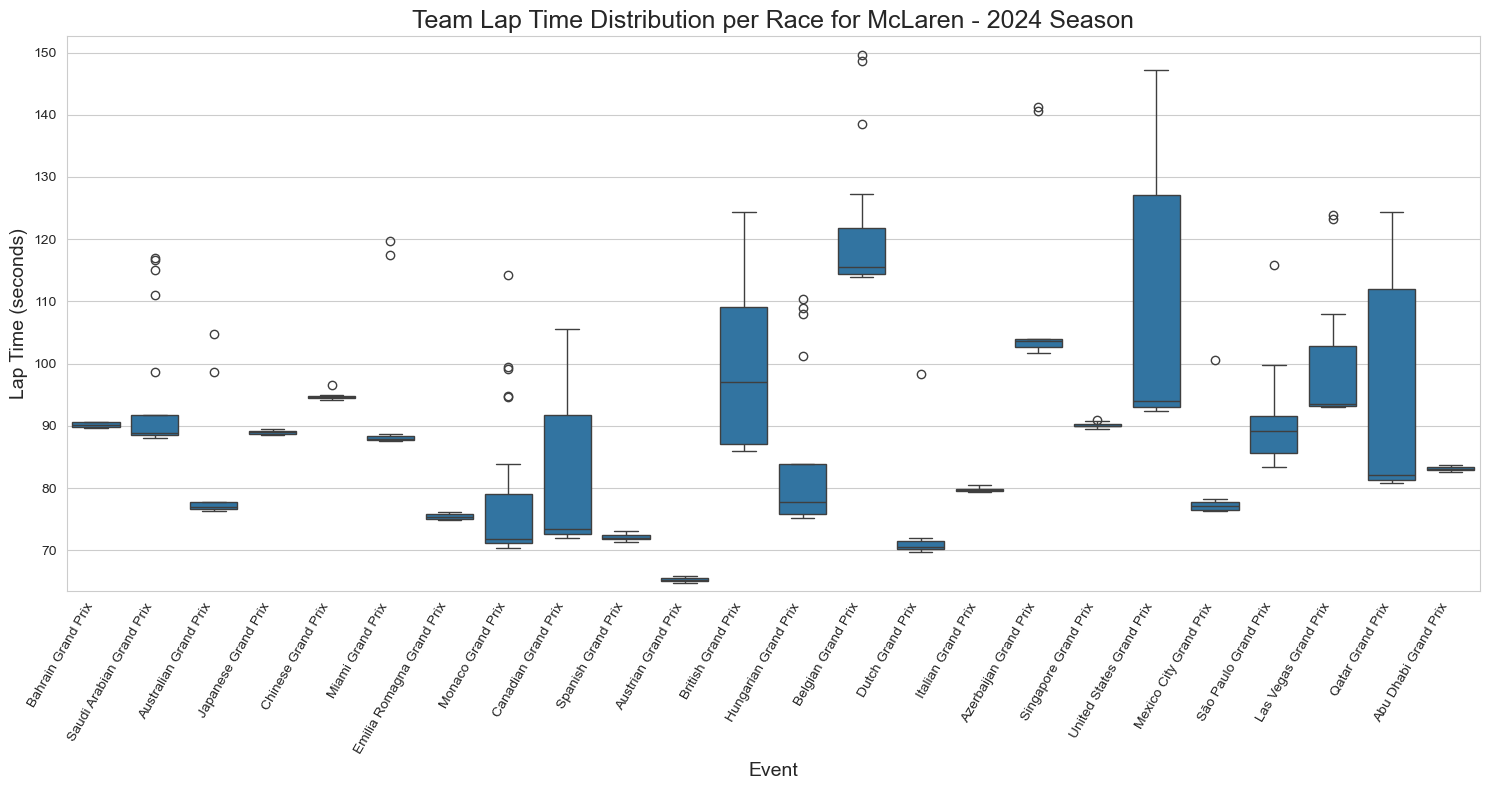

In [54]:

if not McLaren_team_pace.empty:
    print("Generating boxplot...")
    plt.figure(figsize=(15, 8)) # Adjust figure size for better readability

    sns.boxplot(data=McLaren_team_pace, x='Event', y='LapTime') # Use a nice color palette
    plt.title(f"Team Lap Time Distribution per Race for {TEAM} - {SEASON} Season", fontsize=18)
    plt.xlabel("Event", fontsize=14)
    plt.ylabel("Lap Time (seconds)", fontsize=14)
    plt.xticks(rotation=60, ha='right', fontsize=10) # Rotate x-axis labels for clarity
    plt.yticks(fontsize=10)
    plt.ylim(McLaren_team_pace['LapTime'].min() * 0.98, McLaren_team_pace['LapTime'].max() * 1.02) # Adjust y-axis limits slightly


    plt.tight_layout() # Adjust plot layout
    plt.show() # Display the plot
else:
    print(f"No data to plot for {TEAM} in {SEASON}.")

Processing Bahrain Grand Prix for Red Bull Racing's 2024 season
Processing Saudi Arabian Grand Prix for Red Bull Racing's 2024 season
Processing Australian Grand Prix for Red Bull Racing's 2024 season
Processing Japanese Grand Prix for Red Bull Racing's 2024 season
Processing Chinese Grand Prix for Red Bull Racing's 2024 season
Processing Miami Grand Prix for Red Bull Racing's 2024 season
Processing Emilia Romagna Grand Prix for Red Bull Racing's 2024 season
Processing Monaco Grand Prix for Red Bull Racing's 2024 season
Processing Canadian Grand Prix for Red Bull Racing's 2024 season
Processing Spanish Grand Prix for Red Bull Racing's 2024 season
Processing Austrian Grand Prix for Red Bull Racing's 2024 season
Processing British Grand Prix for Red Bull Racing's 2024 season
Processing Hungarian Grand Prix for Red Bull Racing's 2024 season
Processing Belgian Grand Prix for Red Bull Racing's 2024 season
Processing Dutch Grand Prix for Red Bull Racing's 2024 season
Processing Italian Grand

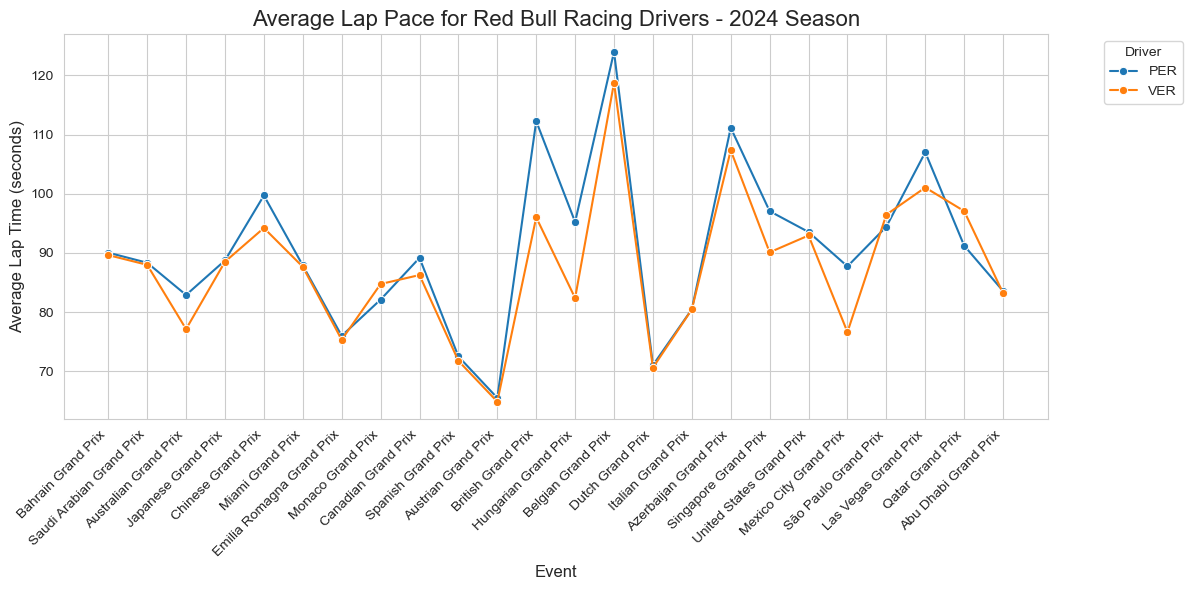

In [55]:
SEASON = 2024
TEAM = 'Red Bull Racing'

RedBull_drivers_pace, RedBull_team_pace = car_pace(SEASON, TEAM)

In [56]:
RedBull_team_pace['Team'] = 'Red Bull Racing'
McLaren_team_pace['Team'] = 'McLaren'

team_pace = pd.concat([RedBull_team_pace, McLaren_team_pace])

RedBull_drivers_pace['Team'] = 'Red Bull Racing'
McLaren_drivers_pace['Team'] = 'McLaren'

Perez_pace = RedBull_drivers_pace[RedBull_drivers_pace['Driver'] == 'PER']

drivers_pace = pd.concat([Perez_pace, McLaren_drivers_pace])

In [51]:
drivers_pace['Driver'].value_counts()

Driver
NOR    24
PIA    24
PER    22
Name: count, dtype: int64

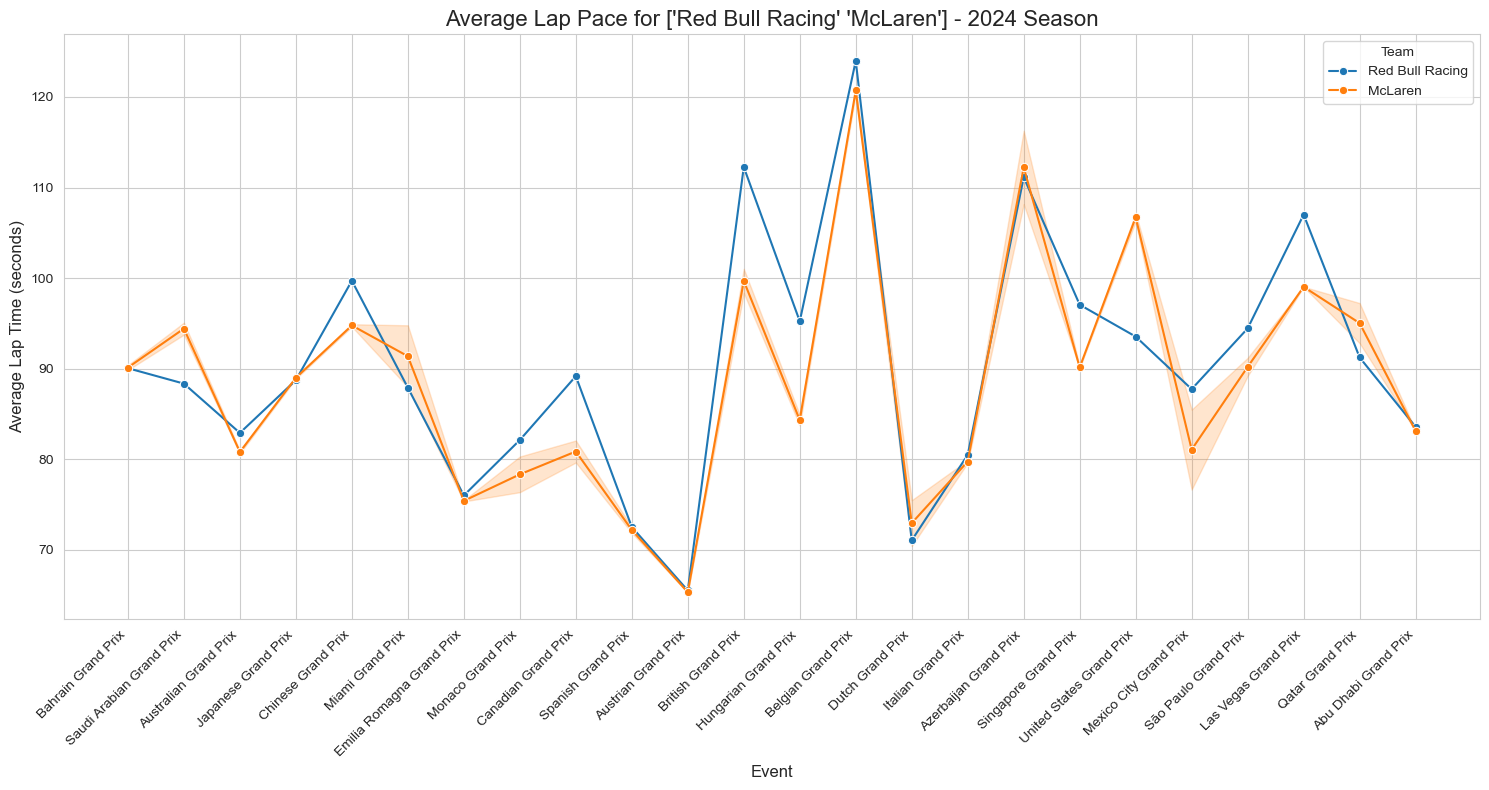

In [57]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=drivers_pace, x='Event', y='AvgLapTime', hue='Team', marker='o')
plt.title(f"Average Lap Pace for {team_pace.Team.unique()} - {SEASON} Season", fontsize=16)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Average Lap Time (seconds)", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() 
plt.show() 

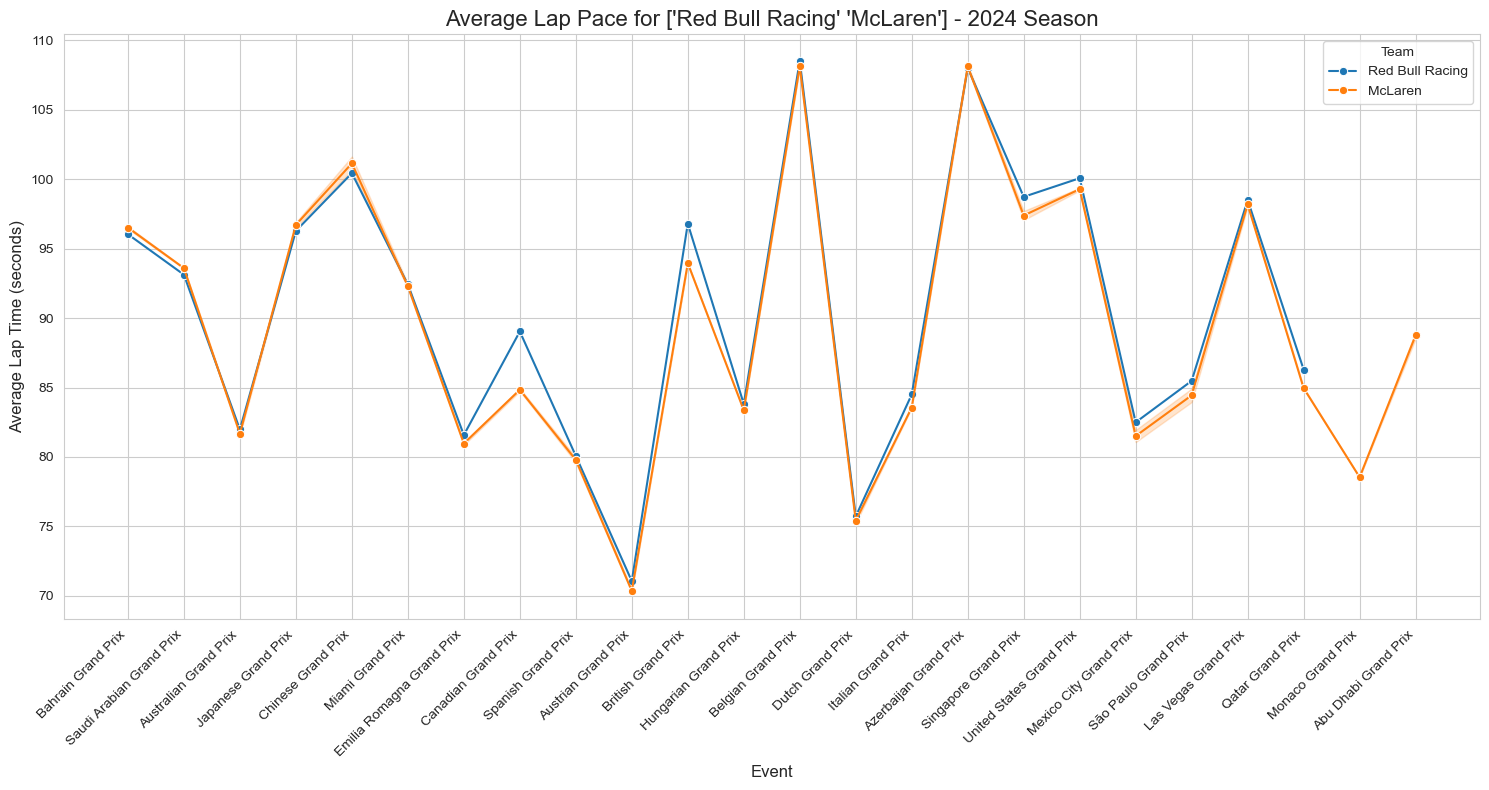

In [49]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=drivers_pace, x='Event', y='AvgLapTime', hue='Team', marker='o')
plt.title(f"Average Lap Pace for {team_pace.Team.unique()} - {SEASON} Season", fontsize=16)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Average Lap Time (seconds)", fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.tight_layout() 
plt.show() 